In [1]:
import pandas as pd


In [3]:
meine_daten = pd.read_csv("cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [4]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "NaN"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1]:
meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
print(meine_daten.topic_comment.value_counts())
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

# print(meine_daten.Username.value_counts())
# meine_daten.loc[meine_daten.Username == "Coraggioso-Ir6WKaaMR"]


NameError: name 'meine_daten' is not defined

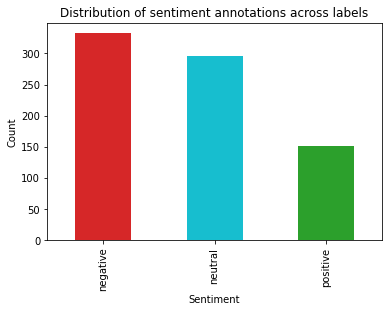

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


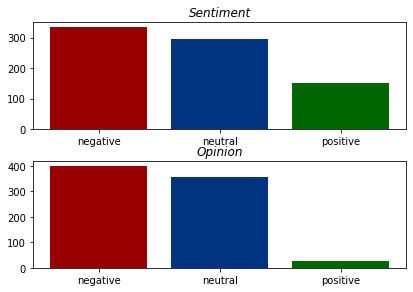

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [12]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

meine_daten.Sentiment.value_counts()

meine_daten.loc[(meine_daten.Sentiment == "positive")]

,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment
68,ab918d4d-866d-47c0-83c9-2153f99c1041,2020-12-25,11:20,0.0,Gisela-sAkF-VjWR,neutral,positive,virus,NaN,"Daher wünsche er sich, dass der Frühling warm ..."
95,6cc899f5-31a3-4d91-8c43-dce99a91b4c4,2020-06-27,10:40,0.0,MrSpock,neutral,positive,virus,virus,"Vielen Dank Herr Söder, für Ihr umsichtiges Ha..."
99,9c832e9f-3e4a-4d37-8026-e3ec8a20344c,2020-10-11,12:37,0.0,Unbequeme,neutral,positive,sperrstunde,sperrstunde,Was für eine Geschichte! Folgt eine Fortsetzun...
105,17bcc116-5469-4050-8b77-5cb5946a13a7,2020-04-05,07:33,0.0,Rolf-mOxqBsEWg,positive,positive,konjunktur,konjunktur,Steuersenkungen nach der Krise sind sehr sinnv...
114,7a380190-cc49-4921-b14c-6fdce65aa286,2020-11-23,10:54,0.0,ray05,neutral,positive,politik,lockerungen,Ideale Grundposition für einen typischen GroKo...
119,bc21f6bc-59cf-4d8b-8317-dcb3f48dae43,2020-04-09,16:32,0.0,HerrX,negative,positive,reiseverbot,reiseverbot,DANKE für die Entscheidung! Habe die ganze Zei...
126,35dffbbb-a21a-4c37-b301-df2385f6670d,2020-04-12,08:38,0.0,Ein-ab0K-xPZg,positive,positive,impfung,impfung,Vielleicht macht BG einfach den Anfang - die K...
129,ef3ed5b3-f09a-418e-80ee-dbc95df97cb0,2021-04-29,17:27,0.0,Aristocat,positive,positive,lockerung,lockerung,"Daumen hoch dafür Frau Lambrecht, in diese Ric..."
243,33bd59e9-e416-45d4-8d3a-cb045e2a7f77,2021-06-15,11:23,0.0,Peter-77Sj0SXGR,negative,positive,maskenpflicht,überblick,Ab Samstag dann entfällt in NRW die Maskenpfli...
263,224c70c2-78a9-49e1-85ff-0972992796d1,2021-01-23,16:28,0.0,Roger-0f8G9ZyZg,neutral,positive,politik,politik,Dr. Anthony Fauci ist ein durch & durch sympat...
